# ATMOS 2022 - Station Analysis

---------

## 0. Import Libraries

In [1]:
import matplotlib.pyplot as plt
import proplot

from utils.data import *
from utils.utils import *
from utils.visualization_codes import *

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

----------

## 1. Open Data

In [2]:
province = 'istanbul'
dt = adjust_station_data(retrieve_station(province))

In [5]:
dt

,Year,Month,Day,Hour,17047,17059,17060,17061,17062,17063,17064,17065,17603,17610,17636,Date
0,2011,1,1,0,0.1,-1.2,0.0,1.0,2.5,-1.0,1.6,-1.7,1.6,-1.0,1.5,2011-01-01 00:00:00
1,2011,1,1,1,0.1,-1.0,0.1,1.1,3.6,-0.3,1.7,-2.4,1.7,-1.1,1.3,2011-01-01 01:00:00
2,2011,1,1,2,-0.5,-1.8,0.8,1.1,3.8,0.7,2.8,-1.1,1.8,-1.0,1.7,2011-01-01 02:00:00
3,2011,1,1,3,-0.1,-1.6,1.5,1.1,3.2,-1.0,3.1,-2.2,1.3,-0.7,0.7,2011-01-01 03:00:00
4,2011,1,1,4,0.0,-1.0,1.0,0.8,3.2,-0.2,3.9,-1.1,1.2,-1.1,1.1,2011-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70123,2018,12,31,19,2.5,6.7,6.7,4.9,6.3,3.7,5.0,4.1,5.6,5.0,5.6,2018-12-31 19:00:00
70124,2018,12,31,20,2.6,4.1,6.3,5.1,6.0,3.6,4.5,3.7,5.3,5.2,5.5,2018-12-31 20:00:00
70125,2018,12,31,21,2.8,3.2,6.1,5.0,5.9,2.9,4.3,3.4,5.0,4.9,5.4,2018-12-31 21:00:00
70126,2018,12,31,22,2.4,3.4,6.2,4.7,5.7,2.0,4.0,2.6,5.0,4.8,5.5,2018-12-31 22:00:00


In [3]:
dt.attrs

{'data-source': 'station',
 'var-name': 'T',
 'unit': 'degC',
 'province': 'istanbul'}

### 1.1 Get Metadata

In [6]:
metadata = get_station_metadata(province)
metadata

,station,location,y,x,height,landuse
0,17047,çatalca,41.3409,28.3568,370,nourban
1,17059,sarıyer kuzey,41.2505,29.0384,35,nourban
2,17060,atatürk airport,40.9819,28.8208,33,urban
3,17061,sarıyer,41.1464,29.0502,62,urban
4,17062,kadıköy rıhtım,40.9883,29.0190,2,urban
5,17063,sabiha gökçen airport,40.8977,29.3033,91,urban
6,17064,istanbul bölge,40.9113,29.1558,16,urban
7,17065,samandıra airport,40.9866,29.2135,124,urban
8,17603,fatih,41.0155,28.9601,45,urban
9,17610,şile,41.1688,29.6007,74,nourban


In [7]:
metadata.attrs

{'data-source': 'station metadata', 'province': 'istanbul', 'height-unit': 'm'}

----------

## 2. Long-Term Mean Difference

Long-term mean difference between urban and nourban in yearly, seasonally, monthly.

In [2]:
provinces = ['istanbul', 'ankara']

# land uses
luses = ['urban', 'nourban']

# date columns
date_cols = ['Date', 'Year', 'Month', 'Day', 'Hour']

# define datetime column name
datetime_col = 'Date'

# define mean types
mean_types = ['yearly', 'seasonal', 'monthly']
    
# mean type formulas
mean_formulas = [
    calculate_yearly_mean,
    calculate_seasonal_mean,
    calculate_monthly_mean
]

dict_province = {}

for province in provinces:
    
    # get province data
    dt = adjust_station_data(retrieve_station(province))
    metadata = get_station_metadata(province)

    # group urban and nourban stations
    grouped_meta = metadata.groupby('landuse')

    # dict to keep means
    dict_mean_type = {}

    for i, mean_type in enumerate(mean_types):

        dict_luse = {}

        # loop and find land use means
        for luse in luses:

            # get station data with corresponding land use
            luse_stations = grouped_meta.get_group(luse).station.tolist()

            # copy dataframe
            dt_luse = dt[date_cols + luse_stations].copy(deep=True)

            # calculate yearly seasonal and monthly means
            dict_luse[f'{province}-{luse}'] = mean_formulas[i](dt_luse, datetime_col)

        # accumulate mean type data
        dict_mean_type[mean_type] = dict_luse
        
    dict_province[province] = dict_mean_type

In [3]:
# concat istanbul and ankara data
concat_means = {}
for mean_type in mean_types:
    
    # concat
    concat_means[mean_type] = pd.concat([pd.DataFrame(dict_province[provinces[0]][mean_type]), 
                                           pd.DataFrame(dict_province[provinces[1]][mean_type])],
                                           axis=1)

In [4]:
# sample data
concat_means['seasonal']

,istanbul-urban,istanbul-nourban,ankara-urban,ankara-nourban
Season,,,,
DJF,7.273937,6.007992,1.780182,2.155653
MAM,16.493116,14.889766,13.549765,13.907304
JJA,24.701648,23.048766,22.345564,22.527518
SON,13.712096,12.415833,8.110323,8.358061


/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/proplot/ui.py:406: ProPlotWarning: You specified both figsize=(9, 6) and axwidth=1.5. Ignoring 'axwidth'.
/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/proplot/axes/plot.py:507: MatplotlibDeprecationWarning: 
The IndexFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  kw[xname + 'formatter'] = mticker.IndexFormatter(x)
/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/proplot/figure.py:94: MatplotlibDeprecationWarning: 
The 'optimize' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'optimize': ...} instead. If any parameter follows 'optimize', they should be passed as keyword, not positionally.
  result = func(self, *args, **kwargs)
/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/proplot/figure.py:94: MatplotlibDeprecati

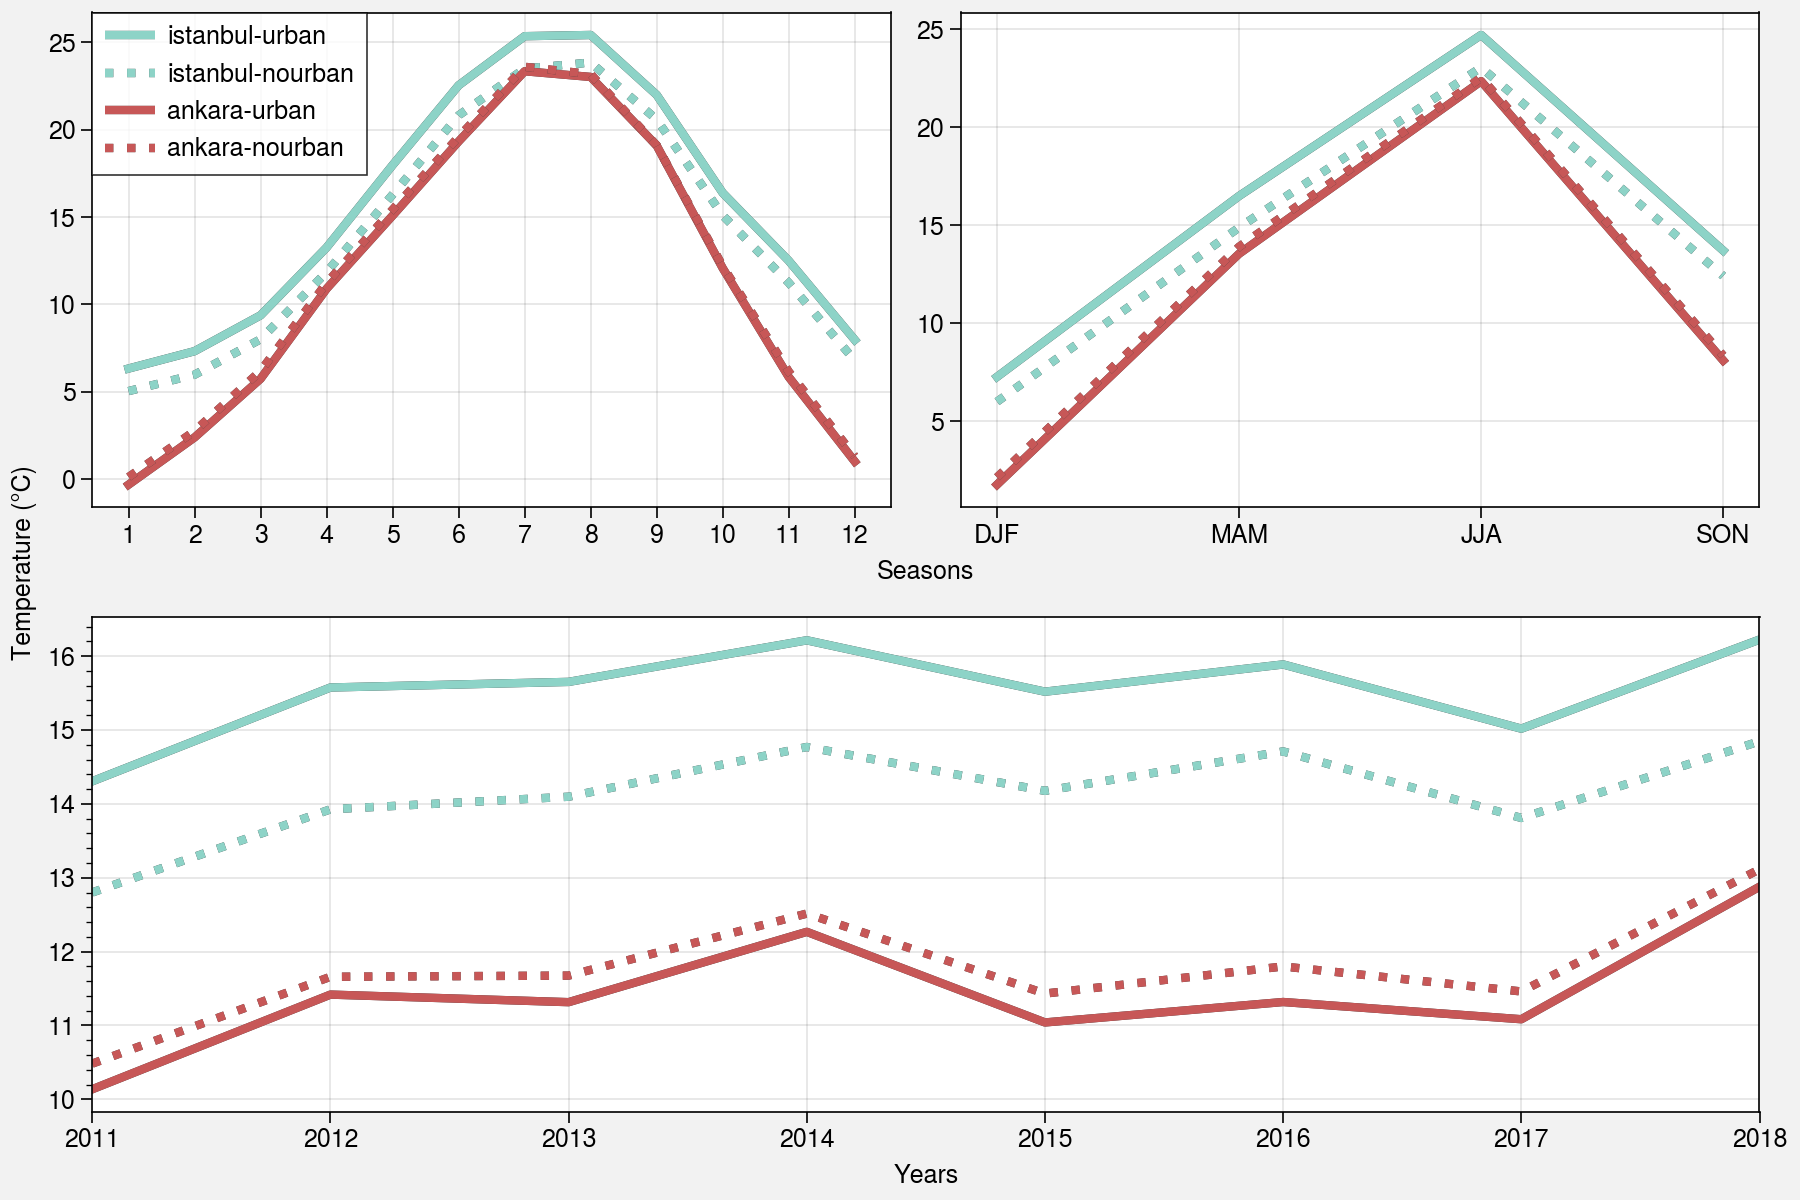

In [5]:
monthly_mean_df = concat_means['monthly']
seasonal_mean_df = concat_means['seasonal']
yearly_mean_df = concat_means['yearly']
method = 'station_time_mean_lineplot'

styles = ['-',':','-', ':']
colors = ['#8dd3c7', '#8dd3c7', '#c75757', '#c75757']

station_time_mean_lineplot(monthly_mean_df,
                           seasonal_mean_df,
                           yearly_mean_df,
                           method,
                           styles,
                           colors)